In [195]:
from __future__ import print_function
import pandas as pd
from pandas import Series, DataFrame
import os


In [196]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [197]:
!curl https://data.cityofnewyork.us/api/views/jb7j-dtam/rows.csv?accessType=DOWNLOAD > causeOfDeath.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91294    0 91294    0     0   463k      0 --:--:-- --:--:-- --:--:--  464k


In [198]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yc1786/PUIdata


In [199]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yc1786/PUIdata


In [200]:
!mv causeOfDeath.csv $PUIDATA

In [201]:
!ls $PUIdata

HW1_3_instructions.ipynb  PUI2018  setupPUIDATA.ipynb
projects		  PUIdata  Untitled.ipynb


In [202]:
#read in the data with pandas
cod = pd.read_csv("%s"%os.getenv("PUIDATA"))

In [203]:
cod.head(7)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5
1,2011,Mental and Behavioral Disorders due to Acciden...,M,Not Stated/Unknown,5,.,.
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3
3,2008,Certain Conditions originating in the Perinata...,F,Other Race/ Ethnicity,.,.,.
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4
5,2007,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,Not Stated/Unknown,5,.,.
6,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6


In [204]:
cod2 = cod[['Death Rate','Deaths']]

In [205]:
cod2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
Death Rate    1094 non-null object
Deaths        1094 non-null object
dtypes: object(2)
memory usage: 17.2+ KB


In [206]:
pd1 = pd.to_numeric(cod2['Death Rate'], errors = 'coerce').to_frame()
pd2 = pd.to_numeric(cod2['Deaths'], errors = 'coerce').to_frame()
newPD =pd1.join(pd2)
newPD

,Death Rate,Deaths
0,35.1,299.0
1,NaN,5.0
2,215.7,1840.0
3,NaN,NaN
4,5.1,64.0
5,NaN,5.0
6,17.8,152.0
7,43.1,220.0
8,72.8,437.0
9,NaN,12.0


In [209]:
cod_2 = newPD.dropna()

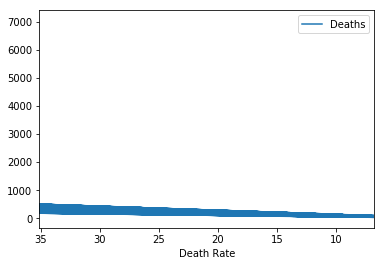

In [212]:
cod_2.plot(x="Death Rate", y="Deaths")

In [211]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


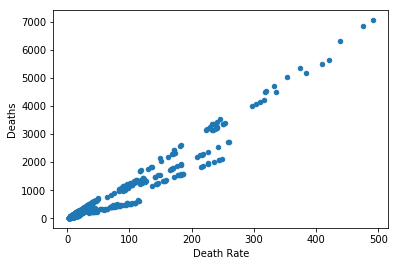

In [213]:
cod_2.plot(x="Death Rate", y="Deaths", kind='scatter');